# Student Performance and Aptitude Analysis

## The Key English Course Company - Indonesia

## A Comprehensive Data-Driven Study


**Analysis Date:** January 13, 2026
**Total Students:** 150 (50 per course level)
**Variables Analyzed:** Performance Scores, Aptitude Scores
**Statistical Methods:** ANOVA, Correlation, Effect Sizes, Post-Hoc Tests
    

## Chapter 1: Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Plotting setup
sns.set(style="darkgrid")
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    plt.ion()

## Chapter 2: Data Loading and Overview

In [2]:
# Load Datasets
df_apt = pd.read_csv('data/student_aptitude_data.csv')
df_perf = pd.read_csv('data/student_performance_data.csv')
df = pd.read_csv('data/student_combined_data.csv')

# Ensure order
order = ["Advanced", "Intermediate", "Foundation"]
df["course_level"] = pd.Categorical(df["course_level"], categories=order, ordered=True)

print("Combined Data Shape:", df.shape)
display(df.head())
print("\nData Info:")
df.info()

Combined Data Shape: (150, 4)


,student_id,course_level,performance_score,aptitude_score
0,1,Advanced,3.70,72
1,2,Advanced,3.65,90
2,3,Advanced,3.55,68
3,4,Advanced,3.45,84
4,5,Advanced,3.55,72



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   student_id         150 non-null    int64   
 1   course_level       150 non-null    category
 2   performance_score  150 non-null    float64 
 3   aptitude_score     150 non-null    int64   
dtypes: category(1), float64(1), int64(2)
memory usage: 3.9 KB


## Chapter 3: Descriptive Statistics by Course Level

In [3]:
print("--- Descriptive Statistics for All Columns ---")
display(df.describe())

print("\n--- Performance Score Stats by Course Level ---")
perf_stats = df.groupby("course_level", observed=False)["performance_score"].describe()
display(perf_stats)

print("\n--- Aptitude Score Stats by Course Level ---")
apt_stats = df.groupby("course_level", observed=False)["aptitude_score"].describe()
display(apt_stats)

--- Descriptive Statistics for All Columns ---


,student_id,performance_score,aptitude_score
count,150.000000,150.000000,150.000000
mean,75.500000,2.540667,44.240000
std,43.445368,0.652830,24.228133
min,1.000000,1.550000,9.000000
25%,38.250000,1.950000,22.000000
50%,75.500000,2.475000,38.000000
75%,112.750000,3.037500,65.000000
max,150.000000,3.800000,97.000000



--- Performance Score Stats by Course Level ---


,count,mean,std,min,25%,50%,75%,max
course_level,,,,,,,,
Advanced,50.0,3.239,0.384029,2.50,2.95,3.375,3.5500,3.80
Intermediate,50.0,2.518,0.391460,1.90,2.25,2.475,2.7875,3.55
Foundation,50.0,1.865,0.176777,1.55,1.75,1.825,1.9500,2.45



--- Aptitude Score Stats by Course Level ---


,count,mean,std,min,25%,50%,75%,max
course_level,,,,,,,,
Advanced,50.0,67.46,19.171844,30.0,50.00,70.0,83.0,97.0
Intermediate,50.0,42.74,18.279921,14.0,31.00,41.5,53.5,90.0
Foundation,50.0,22.52,7.028339,9.0,17.25,21.0,26.0,41.0


## Chapter 4: Statistical Assumption Testing

Checking assumptions for ANOVA: Normality (Shapiro-Wilk) and Homogeneity of Variances (Levene's Test).

In [4]:
# Normality Test (Shapiro-Wilk)(Performance Score)
print("--- Shapiro-Wilk Test for Normality (Performance Score) ---")
for level in order:
    subset = df[df["course_level"] == level]["performance_score"]
    stat, p = shapiro(subset)
    print(f"{level}: W={stat:.3f}, p={p:.3f}")

# Homogeneity of Variance (Levene's Test) (Performance Score)
adv = df[df["course_level"] == "Advanced"]["performance_score"]
intm = df[df["course_level"] == "Intermediate"]["performance_score"]
found = df[df["course_level"] == "Foundation"]["performance_score"]

stat, p = levene(adv, intm, found)
print(f"\nLevene's Test (Performance): W={stat:.3f}, p={p:.3f}")
print()

# Normality Test (Shapiro-Wilk)(Aptitude Score)
print("--- Shapiro-Wilk Test for Normality (Aptitude Score)")
for level in order:
    subset = df[df["course_level"] == level]["aptitude_score"]
    stat, p = shapiro(subset)
    print(f"{level}: W={stat:.3f}, p={p:.3f}")
    
# Homogeneity of Varianca (Levene's Test) (Aptitude Score)
adv_apt = df[df["course_level"] == "Advanced"]["aptitude_score"]
intm_apt = df[df["course_level"] == "Intermediate"]["aptitude_score"]
found_apt = df[df["course_level"] == "Foundation"]["aptitude_score"]

stat, p = levene(adv_apt, intm_apt, found_apt)
print(f"\nLevene's Test (Aptitude): W={stat:.3f}, p={p:.3f}")

--- Shapiro-Wilk Test for Normality (Performance Score) ---
Advanced: W=0.909, p=0.001
Intermediate: W=0.955, p=0.053
Foundation: W=0.949, p=0.031

Levene's Test (Performance): W=16.599, p=0.000

--- Shapiro-Wilk Test for Normality (Aptitude Score)
Advanced: W=0.947, p=0.026
Intermediate: W=0.962, p=0.106
Foundation: W=0.957, p=0.070

Levene's Test (Aptitude): W=20.057, p=0.000


## Chapter 5: One-Way ANOVA Analysis

In [5]:
# ANOVA for Performance Score
f_stat, p_val = f_oneway(adv, intm, found)
print("One-Way ANOVA (Performance Score):")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_val:.3e}")
if p_val < 0.05:
    print("Result: Significant difference found.")
else:
    print("Result: No significant difference.")


# ANOVA for Aptitude Score
f_stat_apt, p_val_apt = f_oneway(adv_apt, intm_apt, found_apt)
print("\nOne-Way ANOVA (Aptitude Score):")
print(f"F-Statistic: {f_stat_apt:.2f}")
print(f"P-Value: {p_val_apt:.3e}")
if p_val_apt < 0.05:
    print("Result: Significant difference found.")
else:
    print("Result: No significant difference.")


One-Way ANOVA (Performance Score):
F-Statistic: 213.43
P-Value: 3.352e-44
Result: Significant difference found.

One-Way ANOVA (Aptitude Score):
F-Statistic: 101.17
P-Value: 2.342e-28
Result: Significant difference found.


## Chapter 6: Post-Hoc Tests (Tukey HSD)

In [6]:
print("--- Tukey HSD Post-Hoc Test (Performance Score) ---")
tukey_perf = pairwise_tukeyhsd(endog=df['performance_score'], groups=df['course_level'], alpha=0.05)
print(tukey_perf)

print("\n--- Tukey HSD Post-Hoc Test (Aptitude Score) ---")
tukey_apt = pairwise_tukeyhsd(endog=df['aptitude_score'], groups=df['course_level'], alpha=0.05)
print(tukey_apt)

--- Tukey HSD Post-Hoc Test (Performance Score) ---


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2    meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
  Advanced   Foundation   -1.374   0.0 -1.5315 -1.2165   True
  Advanced Intermediate   -0.721   0.0 -0.8785 -0.5635   True
Foundation Intermediate    0.653   0.0  0.4955  0.8105   True
-------------------------------------------------------------

--- Tukey HSD Post-Hoc Test (Aptitude Score) ---
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
  Advanced   Foundation   -44.94   0.0 -52.4329 -37.4471   True
  Advanced Intermediate   -24.72   0.0 -32.2129 -17.2271   True
Foundation Intermediate    20.22   0.0  12.7271  27.7129   True
---------------------------------------------------------------


## Chapter 7: Correlation Analysis

In [7]:
corr_matrix = df[['performance_score', 'aptitude_score']].corr()
print("Correlation Matrix:")
display(corr_matrix)

r = df['performance_score'].corr(df['aptitude_score'])
print(f"\nPearson Correlation r: {r:.3f}")

# Correlation per level
for level in df['course_level'].unique():
    corr = df[df['course_level'] == level]['performance_score'].corr(df[df['course_level'] == level]['aptitude_score'])
    print(f"\nCorrelation for level {level}: {corr:.3f}")





Correlation Matrix:


,performance_score,aptitude_score
performance_score,1.000000,0.887417
aptitude_score,0.887417,1.000000



Pearson Correlation r: 0.887

Correlation for level Advanced: 0.777

Correlation for level Intermediate: 0.704

Correlation for level Foundation: 0.299


## Chapter 8: Effect Sizes (Cohen's d)

In [8]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx - 1)*x.var(ddof=1) + (ny - 1)*y.var(ddof=1)) / (nx + ny - 2)
    )
    return (x.mean() - y.mean()) / pooled_std

print("--- Cohen's d (Performance Score) ---")
print(f"Adv vs Intm: {cohens_d(adv, intm):.2f}")
print(f"Intm vs Found: {cohens_d(intm, found):.2f}")
print(f"Adv vs Found: {cohens_d(adv, found):.2f}")

print("\n--- Cohen's d (Aptitude Score) ---")
print(f"Adv vs Intm: {cohens_d(adv_apt, intm_apt):.2f}")
print(f"Intm vs Found: {cohens_d(intm_apt, found_apt):.2f}")
print(f"Adv vs Found: {cohens_d(adv_apt, found_apt):.2f}")


--- Cohen's d (Performance Score) ---
Adv vs Intm: 1.86
Intm vs Found: 2.15
Adv vs Found: 4.60

--- Cohen's d (Aptitude Score) ---
Adv vs Intm: 1.32
Intm vs Found: 1.46
Adv vs Found: 3.11


## Chapter 9: Comprehensive Visualizations

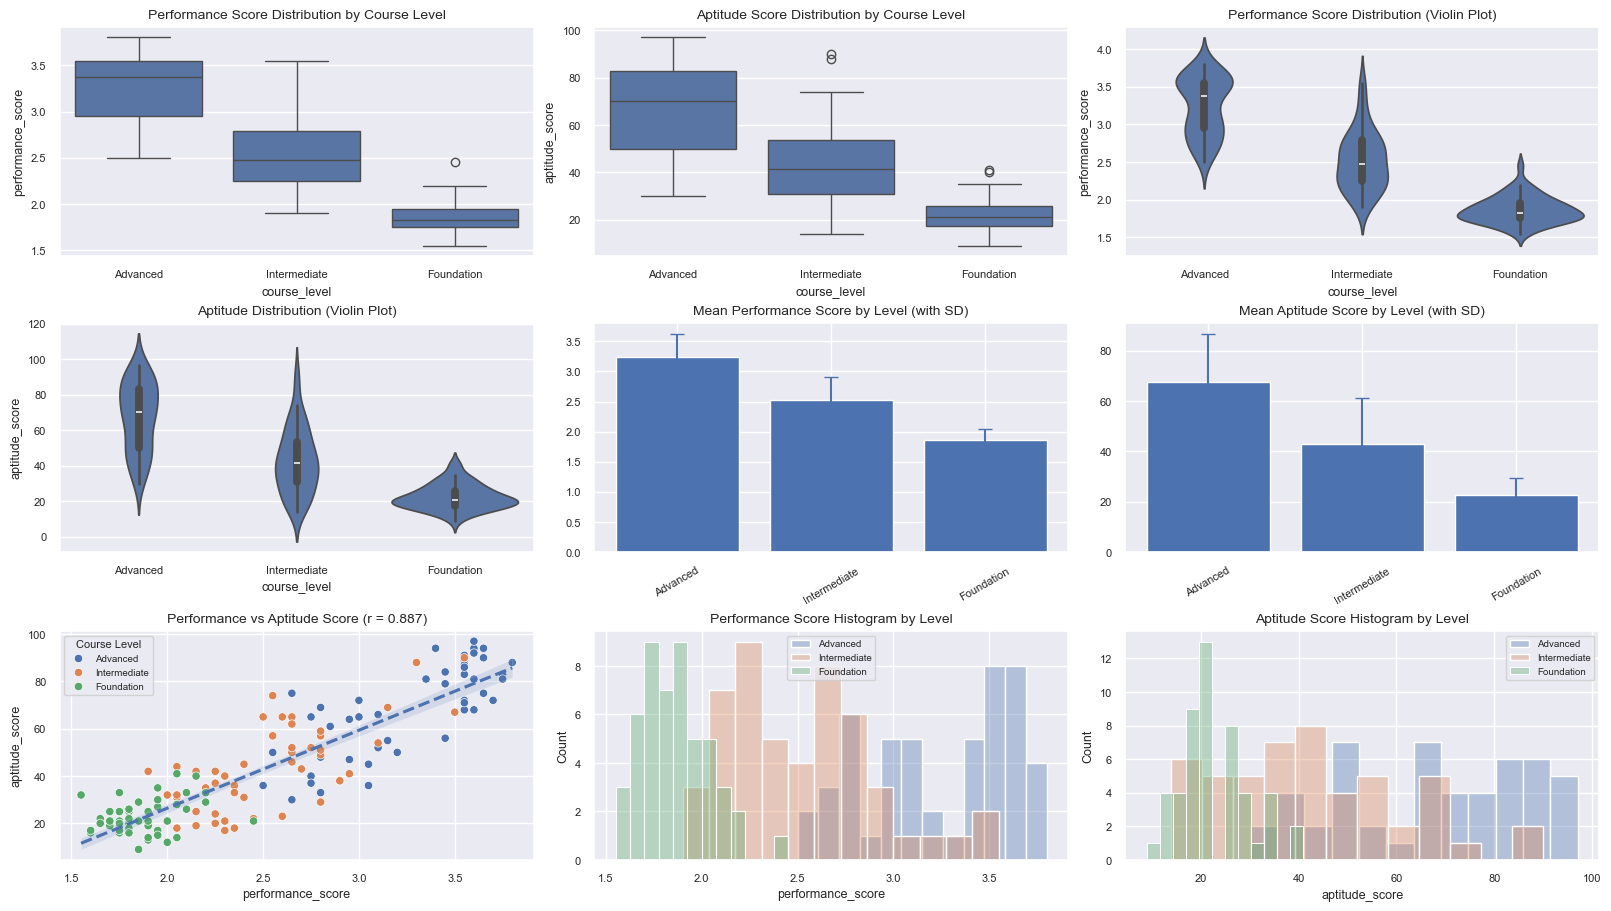

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    df = pd.read_csv("data/student_combined_data.csv")

    sns.set(style="darkgrid")
    order = ["Advanced", "Intermediate", "Foundation"]

    df["course_level"] = pd.Categorical(df["course_level"], categories=order, ordered=True)

    perf_stats = df.groupby("course_level", observed=False)["performance_score"].agg(["mean", "std"]).reindex(order)
    apt_stats  = df.groupby("course_level", observed=False)["aptitude_score"].agg(["mean", "std"]).reindex(order)

    r = df["performance_score"].corr(df["aptitude_score"])

    fig, axes = plt.subplots(3, 3, figsize=(16, 9), constrained_layout=True)

    sns.boxplot(data=df, x="course_level", y="performance_score", order=order, ax=axes[0,0])
    axes[0,0].set_title("Performance Score Distribution by Course Level")

    sns.boxplot(data=df, x="course_level", y="aptitude_score", order=order, ax=axes[0,1])
    axes[0,1].set_title("Aptitude Score Distribution by Course Level")

    sns.violinplot(data=df, x="course_level", y="performance_score", order=order, inner="box", ax=axes[0,2])
    axes[0,2].set_title("Performance Score Distribution (Violin Plot)")

    sns.violinplot(data=df, x="course_level", y="aptitude_score", order=order, inner="box", ax=axes[1,0])
    axes[1,0].set_title("Aptitude Distribution (Violin Plot)")

    axes[1,1].bar(order, perf_stats["mean"].values)
    axes[1,1].errorbar(order, perf_stats["mean"].values, yerr=perf_stats["std"].values, fmt="none", capsize=5)
    axes[1,1].set_title("Mean Performance Score by Level (with SD)")
    axes[1,1].tick_params(axis="x", rotation=30)

    axes[1,2].bar(order, apt_stats["mean"].values)
    axes[1,2].errorbar(order, apt_stats["mean"].values, yerr=apt_stats["std"].values, fmt="none", capsize=5)
    axes[1,2].set_title("Mean Aptitude Score by Level (with SD)")
    axes[1,2].tick_params(axis="x", rotation=30)

    sns.scatterplot(data=df, x="performance_score", y="aptitude_score", hue="course_level", hue_order=order, ax=axes[2,0])
    sns.regplot(data=df, x="performance_score", y="aptitude_score", scatter=False, ax=axes[2,0], line_kws={"linestyle":"--"})
    axes[2,0].set_title(f"Performance vs Aptitude Score (r = {r:.3f})")
    axes[2,0].legend(title="Course Level", loc="upper left", fontsize=7, title_fontsize=8)

    for lvl in order:
        sns.histplot(df.loc[df["course_level"] == lvl, "performance_score"],
                     bins=12, alpha=0.35, ax=axes[2,1], label=lvl)
    axes[2,1].set_title("Performance Score Histogram by Level")
    axes[2,1].legend(fontsize=7)

    for lvl in order:
        sns.histplot(df.loc[df["course_level"] == lvl, "aptitude_score"],
                     bins=12, alpha=0.35, ax=axes[2,2], label=lvl)
    axes[2,2].set_title("Aptitude Score Histogram by Level")
    axes[2,2].legend(fontsize=7)

    for ax in axes.ravel():
        ax.title.set_fontsize(10)
        ax.xaxis.label.set_size(9)
        ax.yaxis.label.set_size(9)
        ax.tick_params(labelsize=8)

    plt.savefig("assets/visual_comparison.png", dpi=300)
    plt.show()



main() # Calling the main function defined in the script code above

## Chapter 10: Summary and Conclusions


### Summary of Findings
1. **Performance**: There is a significant difference in performance scores between all course levels (Advanced > Intermediate > Foundation).
2. **Aptitude**: Aptitude scores also show significant differences and follow the same trend.
3. **Correlation**: There is a strong positive correlation between aptitude and performance.
4. **Effect Size**: The effect sizes (Cohen's d) between groups are large, indicating substantial practical significance.

### Conclusion
The analysis confirms that the course levels effectively segment students by both current performance and underlying aptitude.
    